# 1-Metni küçük harfe dönüştürme, 2- emojileri kaldırma, 3- @ "#" başlayan kelimeleri yani bahsetmeleri sil





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [4]:
df_temiz = pd.read_csv(r'C:\Users\doganeren.ozer\Desktop\twitter scraping\birlestirilmis_karistirilmis.csv', encoding='utf-8')

In [5]:
df_temiz.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Jul 20 13:22:17 +0000 2020,1.285203e+18,"""@Akparti li tüm kadın vekillerden ve @AKKADIN...",0.0,0.0,0,0.0,tr,286791360,1285203376834314242,serifegupgup,https://twitter.com/serifegupgup/status/128520...
1,Thu Feb 29 07:51:02 +0000 2024,1.763110e+18,"""@tcsavunma olacak iş değil""",0.0,0.0,0,0.0,tr,335212962,1763109610456580500,SerkanATAACAR,https://twitter.com/SerkanATAACAR/status/17631...
2,Thu Nov 24 20:34:37 +0000 2022,1.595879e+18,"""@RTErdogan""",0.0,0.0,0,0.0,qam,1595828148788158465,1595878578603925505,minikpatisevda1,https://twitter.com/minikpatisevda1/status/159...
3,Mon Jan 30 21:26:22 +0000 2023,1.620172e+18,"""@csgbakanligi Sayın bakan haberturk canlı yay...",0.0,0.0,0,0.0,tr,340523087,1620057550615097344,yavuzdans,https://twitter.com/yavuzdans/status/162017158...
4,Mon Oct 29 18:01:24 +0000 2018,1.056969e+18,"""@Akparti @RT_Erdogan Ne zamandan beri hizmetk...",0.0,0.0,0,0.0,tr,1024588444171952129,1056946569990283264,zcanSARIOLU42,https://twitter.com/zcanSARIOLU42/status/10569...


In [6]:
df_temiz.tail()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
5492081,Tue Aug 28 10:46:02 +0000 2018,1.034392e+18,"""@MHP_Bilgi @YildizFeti Af bekliyoruz Devletin...",0.0,0.0,0,0.0,tr,3378539691,1034362687621394433,0a9245a9f9d7440,https://twitter.com/0a9245a9f9d7440/status/103...
5492082,Sat Apr 27 18:40:55 +0000 2019,1.122209e+18,"""@RTErdogan Eyt liler millet degilmi neden biz...",0.0,0.0,0,0.0,tr,1002896645980377088,1122157207808700422,YurterR,https://twitter.com/YurterR/status/11222090250...
5492083,Tue Oct 11 06:55:03 +0000 2022,1.579727e+18,"""@herkesicinCHP İyi yapmış...""",0.0,0.0,0,0.0,tr,1566656358996402177,1579088395384786947,yusufakat48,https://twitter.com/yusufakat48/status/1579727...
5492084,Tue Nov 19 09:21:58 +0000 2019,1.196720e+18,"""@saglikbakanligi Gelinim 38 haftalık gebe beb...",0.0,0.0,0,0.0,tr,1146121692974112768,1196685744431157249,Abdulla72214037,https://twitter.com/Abdulla72214037/status/119...
5492085,Tue Dec 04 20:27:45 +0000 2018,1.070052e+18,"""@MHP_Bilgi Önce kendine bak öyle konuş kendi ...",0.0,0.0,0,0.0,tr,1064128259624001536,1070027456147447808,Nurgliek9,https://twitter.com/Nurgliek9/status/107005205...


In [7]:
# df_temiz in full_text baslıgını text ile değistirelim

df_temiz.rename(columns={'full_text': 'text'}, inplace=True)


In [8]:
df_temiz.head(500)

,created_at,id_str,text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Jul 20 13:22:17 +0000 2020,1.285203e+18,"""@Akparti li tüm kadın vekillerden ve @AKKADIN...",0.0,0.0,0,0.0,tr,286791360,1285203376834314242,serifegupgup,https://twitter.com/serifegupgup/status/128520...
1,Thu Feb 29 07:51:02 +0000 2024,1.763110e+18,"""@tcsavunma olacak iş değil""",0.0,0.0,0,0.0,tr,335212962,1763109610456580500,SerkanATAACAR,https://twitter.com/SerkanATAACAR/status/17631...
2,Thu Nov 24 20:34:37 +0000 2022,1.595879e+18,"""@RTErdogan""",0.0,0.0,0,0.0,qam,1595828148788158465,1595878578603925505,minikpatisevda1,https://twitter.com/minikpatisevda1/status/159...
3,Mon Jan 30 21:26:22 +0000 2023,1.620172e+18,"""@csgbakanligi Sayın bakan haberturk canlı yay...",0.0,0.0,0,0.0,tr,340523087,1620057550615097344,yavuzdans,https://twitter.com/yavuzdans/status/162017158...
4,Mon Oct 29 18:01:24 +0000 2018,1.056969e+18,"""@Akparti @RT_Erdogan Ne zamandan beri hizmetk...",0.0,0.0,0,0.0,tr,1024588444171952129,1056946569990283264,zcanSARIOLU42,https://twitter.com/zcanSARIOLU42/status/10569...
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Wed Aug 17 07:03:39 +0000 2022,1.559798e+18,"""@tcsavunma Allah rahmet eylesin mekanı cennet...",0.0,0.0,0,5.0,tr,1334544658974830595,1559796656668819456,ozenaszr,https://twitter.com/ozenaszr/status/1559798091...
496,Sun Sep 01 07:02:56 +0000 2019,1.168057e+18,"""@kilicdarogluk PKK la iş tutma...""",0.0,0.0,0,0.0,tr,788802047193776128,1168042856176467971,suatoztrk06,https://twitter.com/suatoztrk06/status/1168056...
497,Mon Oct 12 18:44:29 +0000 2020,1.315725e+18,"""@tcmeb Asılsız değil, bu belgeyi okullsr veli...",0.0,0.0,0,2.0,tr,52694535,1315707173113155586,stilikam,https://twitter.com/stilikam/status/1315725039...
498,Sun Apr 21 18:23:36 +0000 2019,1.120030e+18,"""@kilicdarogluk Başkanım arkanızda halk var,bi...",0.0,1.0,0,1.0,tr,748537984992043009,1119529268156010501,yasmingll82,https://twitter.com/yasmingll82/status/1120030...


In [9]:
df_temiz.shape

(5492086, 12)

In [10]:
# Her sütun için NaN değerlerin sayısını hesaplama
nan_counts = df_temiz.isna().sum()

print(nan_counts)

created_at                0
id_str                  269
text                    269
quote_count             761
reply_count             761
retweet_count           761
favorite_count          761
lang                    761
user_id_str             761
conversation_id_str     761
username               1253
tweet_url              1255
dtype: int64


In [12]:
# 'text' sütununda NaN değerleri olan satırları sil
df_temiz.dropna(subset=['text'], inplace=True)

In [13]:
df_temiz.shape

(5491817, 12)

In [14]:
# Her sütun için NaN değerlerin sayısını hesaplama
nan_counts = df_temiz.isna().sum()

print(nan_counts)

created_at               0
id_str                   0
text                     0
quote_count            492
reply_count            492
retweet_count          492
favorite_count         492
lang                   492
user_id_str            492
conversation_id_str    492
username               984
tweet_url              986
dtype: int64


In [15]:
# NaN içeren tüm satırları sil
df_temiz = df_temiz.dropna()

# Yeni tweet sayısını yazdır
print(f"Kalan tweet sayısı: {len(df_temiz)}")


Kalan tweet sayısı: 5490831


In [16]:
# Her sütun için NaN değerlerin sayısını hesaplama
nan_counts = df_temiz.isna().sum()

print(nan_counts)

created_at             0
id_str                 0
text                   0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64


## 1-Metni küçük harfe dönüştürme, emojileri kaldırma

In [18]:
df_temiz_copy = df_temiz.copy()

'''def remove_special_cases(text):
    # Emojileri kaldır
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
                      "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # URL'leri kaldır
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)

    # @ ve # ile başlayan kelimeleri kaldır
    mentions_and_hashtags_pattern = re.compile(r'[@#]\w+')
    text = mentions_and_hashtags_pattern.sub(r'', text)

    # Tek kelime kontrolü ve silme
    if len(text.split()) == 1:
        return ''  # Tek kelime varsa, metni sil
    else:
        return text.strip()

# 'clean_text' sütunu oluşturuluyor ve metin temizleme işlevi uygulanıyor
df_temiz_copy['clean_text'] = df_temiz_copy['full_text'].apply(remove_special_cases)

# 'clean_text' sütununu 3. sütun olarak ekle
col_order = df_temiz_copy.columns.tolist()
new_col_index = 3  # 3. sütun
col_order.insert(new_col_index, col_order.pop(col_order.index('clean_text')))
df_temiz_copy = df_temiz_copy.reindex(columns=col_order)

'''

def remove_special_cases(text):

    # Metni küçük harfe dönüştür
    text = text.lower()

    # Emojileri kaldır
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
                      "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # URL'leri kaldır
    url_pattern = re.compile(r'(https?://\S+)|(www\.\S+)|([a-zA-Z0-9./]+\.[a-zA-Z]{2,})')
    text = url_pattern.sub(r'', text)

    # @ ve # ile başlayan kelimeleri kaldır
    mentions_and_hashtags_pattern = re.compile(r'[@#]\w+')
    text = mentions_and_hashtags_pattern.sub(r'', text)

    return text.strip()

# 'clean_text' sütunu oluşturuluyor ve metin temizleme işlevi uygulanıyor
df_temiz_copy['clean_text'] = df_temiz_copy['text'].apply(remove_special_cases)

# 'clean_text' sütununu 3. sütun olarak ekle
col_order = df_temiz_copy.columns.tolist()
new_col_index = 3  # 3. sütun, 0'dan başlayarak sayılır, bu yüzden 3. sütun için indeks 2'dir.
col_order.insert(new_col_index, col_order.pop(col_order.index('clean_text')))
df_temiz_copy = df_temiz_copy.reindex(columns=col_order)


In [19]:
len(df_temiz_copy)

5490831

In [20]:
df_temiz_copy.head(500)

,created_at,id_str,text,clean_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Jul 20 13:22:17 +0000 2020,1.285203e+18,"""@Akparti li tüm kadın vekillerden ve @AKKADIN...",""" li tüm kadın vekillerden ve dan daha fazla ...",0.0,0.0,0,0.0,tr,286791360,1285203376834314242,serifegupgup,https://twitter.com/serifegupgup/status/128520...
1,Thu Feb 29 07:51:02 +0000 2024,1.763110e+18,"""@tcsavunma olacak iş değil""",""" olacak iş değil""",0.0,0.0,0,0.0,tr,335212962,1763109610456580500,SerkanATAACAR,https://twitter.com/SerkanATAACAR/status/17631...
2,Thu Nov 24 20:34:37 +0000 2022,1.595879e+18,"""@RTErdogan""","""""",0.0,0.0,0,0.0,qam,1595828148788158465,1595878578603925505,minikpatisevda1,https://twitter.com/minikpatisevda1/status/159...
3,Mon Jan 30 21:26:22 +0000 2023,1.620172e+18,"""@csgbakanligi Sayın bakan haberturk canlı yay...",""" sayın bakan haberturk canlı yayında söz verd...",0.0,0.0,0,0.0,tr,340523087,1620057550615097344,yavuzdans,https://twitter.com/yavuzdans/status/162017158...
4,Mon Oct 29 18:01:24 +0000 2018,1.056969e+18,"""@Akparti @RT_Erdogan Ne zamandan beri hizmetk...",""" ne zamandan beri hizmetkarlar efendilerinde...",0.0,0.0,0,0.0,tr,1024588444171952129,1056946569990283264,zcanSARIOLU42,https://twitter.com/zcanSARIOLU42/status/10569...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Wed Aug 17 07:03:39 +0000 2022,1.559798e+18,"""@tcsavunma Allah rahmet eylesin mekanı cennet...",""" allah rahmet eylesin mekanı cennet olsun i̇n...",0.0,0.0,0,5.0,tr,1334544658974830595,1559796656668819456,ozenaszr,https://twitter.com/ozenaszr/status/1559798091...
496,Sun Sep 01 07:02:56 +0000 2019,1.168057e+18,"""@kilicdarogluk PKK la iş tutma...""",""" pkk la iş tutma...""",0.0,0.0,0,0.0,tr,788802047193776128,1168042856176467971,suatoztrk06,https://twitter.com/suatoztrk06/status/1168056...
497,Mon Oct 12 18:44:29 +0000 2020,1.315725e+18,"""@tcmeb Asılsız değil, bu belgeyi okullsr veli...",""" asılsız değil, bu belgeyi okullsr velilere y...",0.0,0.0,0,2.0,tr,52694535,1315707173113155586,stilikam,https://twitter.com/stilikam/status/1315725039...
498,Sun Apr 21 18:23:36 +0000 2019,1.120030e+18,"""@kilicdarogluk Başkanım arkanızda halk var,bi...",""" başkanım arkanızda halk var,biz size inanıyo...",0.0,1.0,0,1.0,tr,748537984992043009,1119529268156010501,yasmingll82,https://twitter.com/yasmingll82/status/1120030...


# 2- 0;0;0; varsa o satırı sil

In [92]:
# "0;0;0" içeren satırları bulun ve yeni bir DataFrame oluşturun
iceren_satirlar_df = df_temiz_copy[df_temiz_copy['clean_text'].str.contains("0;0")].copy()

# "Durum" adında yeni bir sütun ekleyin ve değerlerini "Bulundu" olarak ayarlayın
iceren_satirlar_df['Durum'] = "Bulundu"

In [93]:
iceren_satirlar_df.head(100)

,created_at,id_str,text,clean_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,Durum


In [23]:
print(f"0;0;0 içeren veri sayisi:",len(iceren_satirlar_df.index))

0;0;0 içeren veri sayisi: 0


In [24]:
print(f"silinmeden önceki veri sayısı :",len(df_temiz_copy.index))
df_temiz_copy = df_temiz_copy.drop(iceren_satirlar_df.index)

silinmeden önceki veri sayısı : 5490831


In [25]:


print(f"silindikten sonraki veri sayısı :",len(df_temiz_copy.index))

silindikten sonraki veri sayısı : 5490831


## 3- Kısaltmaların değiştirilmesi



*   bu kısım nasıl geliştirilir. Csv dosyasını chatcptye atarsın ve o kısaltma kelimelerini kendi bulur. ya da csv dosyasından kısaltmaları değiştir diyebiliriz ve buldugun ve değiştirdiğin kelimeleri bana yaz diyebiliriz.

* Avantajları

  * Metin Anlaşılabilirliğinin Artırılması: Kısaltmaların tam hallerine dönüştürülmesi, metnin anlaşılabilirliğini artırır. Bu, modelin metni daha doğru bir şekilde işlemesine ve analiz etmesine olanak tanır.
  Veri Standartlaştırma: Farklı kullanıcılar tarafından farklı şekillerde kullanılan kısaltmaların standart bir formata dönüştürülmesi, veri seti içerisinde tutarlılık sağlar. Bu, model eğitimi sırasında kararlılık ve performansın artırılmasına yardımcı olur.
  Dil Modeli Eğitiminin Kolaylaştırılması: Kısaltmalar genişletildiğinde, dil modelleri bu kelimelerin tam hallerini öğrenir ve anlamlandırır, bu da özellikle doğal dil işleme (NLP) görevlerinde modelin daha etkili olmasını sağlar.

* Dezavantajları

  * Bağlam Kaybı: Bazı kısaltmaların genişletilmesi, özellikle sosyal medya jargonunda belirli bir bağlamı veya alt metni yansıttığı durumlarda, metnin orijinal tonunun veya niyetinin kaybedilmesine neden olabilir.
  Anlam Değişiklikleri: "sn." gibi bazı kısaltmalar birden fazla anlama gelebilir (örneğin, "saniye" veya "sayın"). Bu tür kısaltmaların genişletilmesi, yanlış anlamlandırmalara yol açabilir ve metnin doğruluğunu etkileyebilir.
  Model Performansı Üzerinde Belirsiz Etki: Kısaltmaların genişletilmesi, bazı durumlarda modelin genel performansı üzerinde olumlu bir etki yaparken, bazı özel durumlarda veya görevlerde olumsuz bir etkiye sahip olabilir. Örneğin, metin sınıflandırmada, kısaltmaların özgün kullanımı model için önemli bir özellik olabilir.




In [26]:
# Kısaltmalar ve tam halleri
kısaltmalar_genişletme_sözlüğü = {
    "n'olur": "ne olur",
    "bi'": "bir",
    "Pzt.": "Pazartesi",
    "pzt.": "Pazartesi",
    "bsk.": "başkan",
    "slm.": "selam",
    "gbi": "gibi",
    "vs.": "vesaire",
    "sn.": "sayın",  # ya da "sayın", bağlama göre değişebilir
    "dk.": "dakika",
    "çk.": "çok",
    "grş.": "görüş",
    "tlfn": "telefon",
    "msg": "mesaj",
    "hst.": "hasta",
    "bşk.": "başkan",
    "fkr.": "fikir",
    "örn.": "örnek",
    "mrb.": "merhaba",
    "tl.": "Türk Lirası",
    "dğl.": "değil",
    "dr.": "doktor",
    "prof.": "profesör",
    "mh.": "mahalle",
    "sk.": "sokak",
    "blv.": "bulvar",
    "cd.": "cadde",
    "apt.": "apartman",
    "dpt.": "departman",
    "ünv.": "üniversite",
    "gn.": "genel",
    "fak.": "fakülte",
    "böl.": "bölüm",
    "no.": "numara",
    "abv ": "allah belanı versin ",
    "ibb.": "istanbul belediye başkanı"

}

# Değişiklik yapılan kısaltmaları ve orijinal metinleri kaydetme
değişiklikler = []

# Kısaltmaları genişletme ve değişiklikleri kaydetme fonksiyonu
def kısaltmaları_genişlet_ve_kaydet(metin):
    orijinal_metin = metin
    değişen_metin = metin
    for kısaltma, tam_hali in kısaltmalar_genişletme_sözlüğü.items():
        if kısaltma in metin:
            değişen_metin = değişen_metin.replace(kısaltma, tam_hali)
    if orijinal_metin != değişen_metin:  # Eğer metinde bir değişiklik yapıldıysa
        değişiklikler.append((orijinal_metin, değişen_metin))
    return değişen_metin

# Kısaltmaları genişlet ve değişiklikleri uygula
df_temiz_copy['clean_text'] = df_temiz_copy['clean_text'].apply(kısaltmaları_genişlet_ve_kaydet)

# Değişiklik yapılan kısaltmaları ve yeni metinleri içeren yeni DataFrame oluşturma
değişiklikler_df = pd.DataFrame(değişiklikler, columns=['Orijinal Metin', 'Değişen Metin'])


In [27]:
değişiklikler_df.head(100)

,Orijinal Metin,Değişen Metin
0,""" 1-kolay gelsin. benim şikayet/öneri/i̇steğim...",""" 1-kolay gelsin. benim şikayet/öneri/i̇steğim..."
1,""" bir otobüs bileti olmuş en kısa yer 300 tl.....",""" bir otobüs bileti olmuş en kısa yer 300 Türk..."
2,""" üniversite bölümlerinde yığılma var. başta i...",""" üniversite bölümlerinde yığılma var. başta i..."
3,""" sn. genelbaşkanım şu emeklilikte yaşa takıla...",""" sayın genelbaşkanım şu emeklilikte yaşa takı..."
4,""" sn.özgür özel-yerel seçimlerde ülkemizin ner...",""" sayınözgür özel-yerel seçimlerde ülkemizin n..."
...,...,...
95,""" heykeltraşçılık kurslarınızdan mı bahsediyor...",""" heykeltraşçılık kurslarınızdan mı bahsediyor..."
96,""" boşuna şey etmeyin, bunlar muhtemelen açılma...",""" boşuna şey etmeyin, bunlar muhtemelen açılma..."
97,""" cumhurbaşkanlığı kabinesi yüzyüze eğitim içi...",""" cumhurbaşkanlığı kabinesi yüzyüze eğitim içi..."
98,"""cumhurbaşkanımız'ın eşi sn. hanımefendi'nin t...","""cumhurbaşkanımız'ın eşi sayın hanımefendi'nin..."


In [28]:
print(f"Değişiklik yapılan cümle sayısı: {len(değişiklikler_df)}")

Değişiklik yapılan cümle sayısı: 32364


## 4- TÜM NOKTALAMA İŞARETLERİNİ silme


In [29]:
import re
import pandas as pd

def ozel_karakterleri_sil(metin):
    # Noktalama işaretlerini boşluk ile değiştir
    temiz_metin = re.sub(r'[^\w\s]', '', metin)
    return temiz_metin

# Değişiklikleri kaydetme
değişiklikler = []

for index, row in df_temiz_copy.iterrows():
    orijinal_metin = row['clean_text']
    düzenlenmiş_metin = ozel_karakterleri_sil(orijinal_metin)
    df_temiz_copy.at[index, 'clean_text'] = düzenlenmiş_metin
    if orijinal_metin != düzenlenmiş_metin:
        değişiklikler.append({'Orijinal Metin': orijinal_metin, 'Düzenlenmiş Metin': düzenlenmiş_metin})

# Değişiklikleri içeren yeni bir DataFrame oluşturma
değişiklikler_df = pd.DataFrame(değişiklikler)



In [30]:
# Değişiklik yapılan sütun sayısını bastır ve DataFrame'i göster
print("Değişiklik yapılan sütun sayısı:", len(değişiklikler))



Değişiklik yapılan sütun sayısı: 5490831


In [31]:
değişiklikler_df.head()

,Orijinal Metin,Düzenlenmiş Metin
0,""" li tüm kadın vekillerden ve dan daha fazla ...",li tüm kadın vekillerden ve dan daha fazla g...
1,""" olacak iş değil""",olacak iş değil
2,"""""",
3,""" sayın bakan haberturk canlı yayında söz verd...",sayın bakan haberturk canlı yayında söz verdi...
4,""" ne zamandan beri hizmetkarlar efendilerinde...",ne zamandan beri hizmetkarlar efendilerinden...


## 5- TÜM SAYILARI SİLME

In [32]:
import pandas as pd
import re

# Sayıları silme ve değişiklikleri kaydetme fonksiyonu
def sayilari_sil_ve_kaydet(metin):
    orijinal_metin = metin
    değişen_metin = re.sub(r'\d+', '', metin)  # Tüm sayıları sil
    if orijinal_metin != değişen_metin:  # Eğer metinde bir değişiklik yapıldıysa
        değişiklikler.append((orijinal_metin, değişen_metin))
    return değişen_metin

# Değişiklikleri kaydetme listesi
değişiklikler = []

# DataFrame üzerinde sayıları sil ve değişiklikleri uygula
df_temiz_copy['clean_text'] = df_temiz_copy['clean_text'].apply(sayilari_sil_ve_kaydet)

# Değişiklik yapılan sayıları ve yeni metinleri içeren yeni DataFrame oluşturma
değişiklikler_df = pd.DataFrame(değişiklikler, columns=['Orijinal Metin', 'Değişen Metin'])





In [33]:
# Değişiklik yapılan satır sayısını bastır ve değişiklikleri göster
print("Değişiklik yapılan satır sayısı:", len(değişiklikler))

Değişiklik yapılan satır sayısı: 837306


In [34]:
değişiklikler_df.head()


,Orijinal Metin,Değişen Metin
0,sayın bakan haberturk canlı yayında söz verdi...,sayın bakan haberturk canlı yayında söz verdi...
1,çamlıca kulesi yılda 45 milyon insanı ağırlayacak,çamlıca kulesi yılda milyon insanı ağırlayacak
2,başkan ım rabbim ülkemizi milletimizi bu hai...,başkan ım rabbim ülkemizi milletimizi bu hai...
3,450 km pkk için yürüdün millet için değil yal...,km pkk için yürüdün millet için değil yalan ...
4,hiçbir cezaevinin önünde son model arabalarla...,hiçbir cezaevinin önünde son model arabalarla...


## 6-  Aksanli_karakterleri düzeltme



In [35]:
def sesli_harfleri_duzelt_ve_kaydet(metin):
    duzeltme_sozlugu = {
        'â': 'a',  'ê': 'e', 'ò': 'ö',

    }
    orijinal_metin = metin
    for eski_harf, yeni_harf in duzeltme_sozlugu.items():
        metin = metin.replace(eski_harf, yeni_harf)
    return metin, orijinal_metin != metin

# Değişiklikleri kaydetme
değişiklikler = []

for index, row in df_temiz_copy.iterrows():
    düzenlenmiş_metin, değişiklik_yapıldı = sesli_harfleri_duzelt_ve_kaydet(row['clean_text'])
    if değişiklik_yapıldı:
        değişiklikler.append({'Orijinal Metin': row['clean_text'], 'Düzenlenmiş Metin': düzenlenmiş_metin})
    df_temiz_copy.at[index, 'clean_text'] = düzenlenmiş_metin

# Değişiklikleri içeren yeni bir DataFrame oluşturma
değişiklikler_df = pd.DataFrame(değişiklikler)

In [36]:
değişiklikler_df.head(100)

,Orijinal Metin,Düzenlenmiş Metin
0,hâlâ yalan yine yalan hâlâ iktidara destek...,hala yalan yine yalan hala iktidara destek...
1,hastahanelerimizi de takdir ediyoruz fakat ta...,hastahanelerimizi de takdir ediyoruz fakat ta...
2,allahu teala cc yâr ve yardimcinizrehberiniz ...,allahu teala cc yar ve yardimcinizrehberiniz ...
3,devlet büyüklerimiz bizi bir kenara biraki...,devlet büyüklerimiz bizi bir kenara biraki...
4,rabbim yâr ve yardimciniz olsun inşallah t c ...,rabbim yar ve yardimciniz olsun inşallah t c ...
...,...,...
95,ne kadar ık memleketlerimize gidemez diyorsu...,ne kadar ık memleketlerimize gidemez diyorsu...
96,laf canbazlığında senin üstüne yok teròre lan...,laf canbazlığında senin üstüne yok teröre lan...
97,ne mutlu türküm diyene ne mutlu sizler gibi v...,ne mutlu türküm diyene ne mutlu sizler gibi v...
98,allah tarafıma sesli ve sms yolu ile propağan...,allah tarafıma sesli ve sms yolu ile propağan...


In [37]:
print(len(değişiklikler_df.index))

51578


## 7- Remove multiple spaces

In [41]:
def birden_fazla_boslugu_temizle_ve_kaydet(metin):
    temiz_metin = re.sub(r'\s+', ' ', metin).strip()
    return temiz_metin, metin != temiz_metin

# Değişiklikleri kaydetme
değişiklikler = []

for index, row in df_temiz_copy.iterrows():
    düzenlenmiş_metin, değişiklik_yapıldı = birden_fazla_boslugu_temizle_ve_kaydet(row['clean_text'])
    if değişiklik_yapıldı:
        değişiklikler.append({'Orijinal Metin': row['clean_text'], 'Düzenlenmiş Metin': düzenlenmiş_metin})
    df_temiz_copy.at[index, 'clean_text'] = düzenlenmiş_metin

# Değişiklikleri içeren yeni bir DataFrame oluşturma
değişiklikler_df = pd.DataFrame(değişiklikler)

In [42]:
değişiklikler_df.head(100)

,Orijinal Metin,Düzenlenmiş Metin
0,li tüm kadın vekillerden ve dan daha fazla g...,li tüm kadın vekillerden ve dan daha fazla gay...
1,olacak iş değil,olacak iş değil
2,sayın bakan haberturk canlı yayında söz verdi...,sayın bakan haberturk canlı yayında söz verdin...
3,ne zamandan beri hizmetkarlar efendilerinden...,ne zamandan beri hizmetkarlar efendilerinden d...
4,ben katilmak yapiyorum,ben katilmak yapiyorum
...,...,...
95,kanuna göre ödeme emri takip talebinden itiba...,kanuna göre ödeme emri takip talebinden itibar...
96,kesilen sakal gür çıkarmış başkanım iyi söğü...,kesilen sakal gür çıkarmış başkanım iyi söğüt ...
97,allah yarve yardımcın olsun,allah yarve yardımcın olsun
98,man stop howling wont do you good for your he...,man stop howling wont do you good for your health


In [ ]:
len(değişiklikler_df)

0

In [43]:
def bosluklari_sil_ve_kaydet(metin):
    # Başındaki ve sonundaki boşlukları temizle, ayrıca birden fazla boşluğu tek boşluğa çevir
    temiz_metin = re.sub(r'^\s+|\s+?$', '', metin)  # Baş ve son boşlukları temizler
    temiz_metin = re.sub(r'\s+', ' ', temiz_metin)  # Birden fazla boşluğu tek boşluk yapar
    return temiz_metin, metin != temiz_metin

# Değişiklikleri kaydetme
değişiklikler = []

for index, row in df_temiz_copy.iterrows():
    # 'clean_text' sütunundaki metni düzenliyoruz
    düzenlenmiş_metin, değişiklik_yapıldı = bosluklari_sil_ve_kaydet(row['clean_text'])
    
    # Eğer değişiklik yapıldıysa, değişiklikleri kaydediyoruz
    if değişiklik_yapıldı:
        değişiklikler.append({'Orijinal Metin': row['clean_text'], 'Düzenlenmiş Metin': düzenlenmiş_metin})
    
    # Düzenlenmiş metni 'clean_text' sütununa kaydediyoruz
    df_temiz_copy.at[index, 'clean_text'] = düzenlenmiş_metin

# Değişiklikleri içeren yeni bir DataFrame oluşturma
değişiklikler_df = pd.DataFrame(değişiklikler)

# Sonuçları yazdır
print(değişiklikler_df)


Empty DataFrame
Columns: []
Index: []


## 8- Common words remove

> bu sık kullanılan kelimeler aslında bizim stop wordslerimizdir



In [44]:
text = ' '.join(df_temiz_copy['clean_text'])   # DataFrame'deki 'clean_text' sütunundaki tüm metinleri birleştirir

In [45]:
len(text)      # Birleştirilmiş metnin karakter sayısını hesaplar

441087191

In [47]:
texy = text.split()   # Birleştirilmiş metnin karakter sayısını hesaplar

In [48]:
len(texy)    # Birleştirilmiş metnin karakter sayısını hesaplar

60933623

In [49]:
freq_common = pd.Series(texy).value_counts()   # Kelimelerin frekansını hesaplar ve en sık geçen kelimelerden en az geçenlere doğru sıralar

In [50]:
freq_common    # Length: 171826 tane benzesiz kelime var

bu                 857603
ve                 771073
bir                757606
ne                 425937
için               364448
                    ...  
suyaxam                 1
yasaü                   1
şhanet                  1
taksicidende            1
laborantlarinda         1
Name: count, Length: 2056126, dtype: int64

In [51]:
f20 = freq_common[:20]    # bu sık kullanılan kelimeler aslında bizim stop wordslerimizdir   # En sık geçen ilk 20 kelimeyi seçer

In [52]:
f20      # bu kelimelerden secim yapmamız lazım kemal cıkmamalı chp cıkmamalı istifa cıkmamalı   burdaki analiz stop wordslerin eklenmesinde kullanılabilir

bu       857603
ve       771073
bir      757606
ne       425937
için     364448
olsun    353122
sayın    338352
allah    312451
de       303682
yok      252467
var      250404
da       237901
çok      233147
ile      209318
kadar    187623
mi       178853
gibi     172199
ama      168432
o        165269
siz      164824
Name: count, dtype: int64

In [ ]:
# Her sütun için NaN değerlerin sayısını hesaplama
nan_counts = df_temiz.isna().sum()

print(nan_counts)

created_at               0
id_str                   0
text                     0
quote_count            492
reply_count            492
retweet_count          492
favorite_count         492
lang                   492
user_id_str            492
conversation_id_str    492
username               984
tweet_url              986
dtype: int64


## 9- Rare word remove  

> az kullanılan kelimeler yazım yanlışları oldugu için bu kelimelerin düzeltilmesinde bir aksiyon alınabilir. Bu kelimeleri chatcptye verip düzgün hallerini isteyebiliriz.  


In [53]:
freq_common.tail(50)

dursunkorkan              1
diyorbakan                1
götürüyorlarmış           1
yüreğimizdeko             1
kazanmayacaksin           1
danıinsanlığı             1
kalabaligı                1
bekliyorgücümüz           1
mühimmatımız              1
atılımlaryapay            1
veriyorörneğin            1
başarılıyızyargı          1
öztüıkesiredremitakçay    1
etmesingönderen           1
gövdelrinizide            1
üğraşın                   1
çiğnenmezülkenin          1
depremlerkonusunu         1
chemtrailskimyasal        1
fenerbhacenin             1
arttiramiyorsunuz         1
sürüklediğinizden         1
turtle                    1
djyun                     1
atınözgürlük              1
düşmeyiiiiiin             1
olmalıdıçler              1
geldiğimizşanlı           1
tamamsıkıntı              1
olmamasıhadi              1
kalmağa                   1
marketzincirleri          1
ayricimlik                1
alatasaraya               1
açarlarürk                1
insanlarherhangi    

In [28]:

from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Örnek olarak df_temiz_copy DataFrame'ini varsayıyoruz
# df_temiz_copy = ...

# Tüm 'clean_text' sütununu birleştir ve kelimelere ayır
all_text = ' '.join(df_temiz_copy['clean_text'].dropna())  # NaN değerleri atla
tokens = word_tokenize(all_text)

# Kelime frekanslarını hesapla
word_freq = Counter(tokens)

# Frekansları DataFrame'e dönüştür
freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Frekansı 1 olan kelimeleri bul
least_common_words = [word for word, freq in word_freq.items() if freq == 1]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [29]:
# En az kullanılan kelimeleri yazdır
print(least_common_words)

['ömürboyu', 'köleleri', 'çöplüğüne', 'gömecek', 'haric', 'düsünüyor', 'düsünüp', 'istedigi', 'oynatiyor', 'merakli', 'okulunda', 'bildirilecek', 'vatanseverseniz', 'verirdiniz', 'italyan', 'ispanyol', 'sırp', 'kosova', 'taksinlar', 'sipariş', 'bekleyip', 'duralım', 'başvurduk', 'yargılananlara', 'ds', 'sevinelim', 'ei', 'atilmazsa', 'sağlığımdan', 'olacam', 'erciyes', 'bakımı', 'ünitesinde', 'duyduğum', 'yalvardım', 'hastasına', 'jenerasyona', 'mısınızbi', 'platformunu', 'kapatacaksiniz', 'devletinbağlı', 'üstündemaaşlara', 'yapmaması', 'gereğine', 'musunuzuyarmısınız', 'gündemin', 'başlıklarını', 'değerlendirecek', 'duymali', 'kirazı', 'edenlerle', 'diimi', 'yalovanın', 'masak', 'bilirkişi', 'sessizsiniz', 'baskanlık', 'seylerle', 'avunursunuz', 'fikra', 'yayınlanmış', 'talip', 'olacaksan', 'etik', 'adamlik', 'ruh', 'insandabunlarin', 'karşisinakorkakkk', 'manipülasyoncu', 'sallayarak', 'tarafın', 'hamlede', 'seversen', 'billa', 'bitirdiniz', 'naaıl', 'tehtit', 'aldınızdsa', 'yargıla

# zemberek ile türkish speel check

In [30]:
!pip install zemberek-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141211 sha256=46318e1e26728e99f4ddcc59f1cec3d77203c3cad823ee6f9b0cdfc14ed53516
  Stored in directory: /root/.cache/pip/wheels/a7/20/bd/e1477d664f22d99989fd28ee1a43d6633dddb5cb9e801350d5
Successfully built antlr4-python3-runtime


In [31]:
from zemberek import TurkishMorphology, TurkishSpellChecker

In [32]:
# Morphology ve SpellChecker nesnelerini yaratma
morphology = TurkishMorphology.create_with_defaults()
spell_checker = TurkishSpellChecker(morphology)



INFO:zemberek.morphology.turkish_morphology:TurkishMorphology instance initialized in 17.192866802215576


2024-05-23 20:11:35,556 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 17.192866802215576



In [34]:
def correct_spelling(text):
    words = text.split()  # Basit bir tokenizasyon
    corrected_words = []
    for word in words:
        suggestions = spell_checker.suggest_for_word(word)
        corrected_word = suggestions[0] if suggestions else word
        corrected_words.append(corrected_word)
    return ' '.join(corrected_words)

# 'clean_text' sütunundaki metinleri düzeltilmiş halleriyle 'corrected_text' sütununa kaydet
df_temiz_copy['clean_text'] = df_temiz_copy['clean_text'].apply(correct_spelling)



In [35]:
# prompt: df_temiz_copy yi csv olarak kaydet

df_temiz_copy.to_csv('/content/drive/MyDrive/otomasyon_tweet/preprocess/df8000veri_duzeltilmis.csv', index=False)


In [ ]:
# Sonuçları göster
df_temiz_copy.head()

,clean_text,sentiment
0,ömürboyu borçlu mazlum müslüman müebbet nafaka...,Negative
1,mayısta türkiye sizi tarihin çöplüğüne gömecek,Negative
2,meb öğrenim özrü haric herşeyi düsünüyor bizid...,Negative
3,reis yürü millet yürüsün arkandan,Positive
4,yazik istedigi gibi oynatiyor oynamaya merakli...,Negative


## 10- NULL TEXT VARSA O SATIRI SİL

In [54]:
# Boş metin içeren satırların sayısını hesapla ve göster
def count_empty_text_rows(df, column_name):
    empty_text_count = (df[column_name] == '').sum()
    print(f"Boş metin içeren satır sayısı: {empty_text_count}")
    return empty_text_count

# Boş metin içeren satırları sil
def remove_empty_text_rows(df, column_name):
    before_removal = len(df)
    df_result = df[df[column_name] != '']
    after_removal = len(df_result)
    print(f"Silinmeden önceki satır sayısı: {before_removal}, silindikten sonraki satır sayısı: {after_removal}")
    return df_result

In [55]:
# Boş metin içeren satırların sayısını göster
count_empty_text_rows(df_temiz_copy, 'clean_text')

# Boş metin içeren satırları sil ve sonucu göster
df_temiz_copy = remove_empty_text_rows(df_temiz_copy, 'clean_text')

Boş metin içeren satır sayısı: 894453
Silinmeden önceki satır sayısı: 5490831, silindikten sonraki satır sayısı: 4596378


In [ ]:
# EĞER ZEMBEREK ÇALIŞTIRDIYSAK BU KODU CALISTIR
count_empty_text_rows(df_temiz_copy, 'corrected_text')
df_temiz_copy = remove_empty_text_rows(df_temiz_copy, 'corrected_text')

KeyError: 'corrected_text'

In [56]:

df_temiz_copy.head(5)

,created_at,id_str,text,clean_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Jul 20 13:22:17 +0000 2020,1.285203e+18,"""@Akparti li tüm kadın vekillerden ve @AKKADIN...",li tüm kadın vekillerden ve dan daha fazla gay...,0.0,0.0,0,0.0,tr,286791360,1285203376834314242,serifegupgup,https://twitter.com/serifegupgup/status/128520...
1,Thu Feb 29 07:51:02 +0000 2024,1.763110e+18,"""@tcsavunma olacak iş değil""",olacak iş değil,0.0,0.0,0,0.0,tr,335212962,1763109610456580500,SerkanATAACAR,https://twitter.com/SerkanATAACAR/status/17631...
3,Mon Jan 30 21:26:22 +0000 2023,1.620172e+18,"""@csgbakanligi Sayın bakan haberturk canlı yay...",sayın bakan haberturk canlı yayında söz verdin...,0.0,0.0,0,0.0,tr,340523087,1620057550615097344,yavuzdans,https://twitter.com/yavuzdans/status/162017158...
4,Mon Oct 29 18:01:24 +0000 2018,1.056969e+18,"""@Akparti @RT_Erdogan Ne zamandan beri hizmetk...",ne zamandan beri hizmetkarlar efendilerinden d...,0.0,0.0,0,0.0,tr,1024588444171952129,1056946569990283264,zcanSARIOLU42,https://twitter.com/zcanSARIOLU42/status/10569...
5,Sun Sep 11 17:10:24 +0000 2022,1.569010e+18,"""@tcailesosyal @deryayanikashb Ben Irakliyim.....",ben katilmak yapiyorum,0.0,0.0,0,0.0,tr,1566085987184304135,1569006905908928513,jasim_manaf,https://twitter.com/jasim_manaf/status/1569010...


In [57]:
# prompt: sentiment sütunu boş olanları bana sayısını göster

df_temiz_copy[df_temiz_copy['sentiment'].isnull()].shape[0]

KeyError: 'sentiment'

In [61]:
len(df_temiz_copy)

4596378

## 11- lang tr olmayanları siliyoruz

In [ ]:
# 'lang' sütununda 'tr' olmayanları filtreleyerek silme
silinenler = df_temiz_copy[df_temiz_copy['lang'] != 'tr']

# Silinen satırları ayrı bir DataFrame'e kaydet
df_temiz_copy = df_temiz_copy[df_temiz_copy['lang'] == 'tr']

# Silinen satır sayısını yazdırma
print(f"\nToplam {len(silinenler)} satır silindi.")


In [ ]:
silinenler.head(20)

In [ ]:
len(df_temiz_copy)

## 12-METİNDE TEK VEYA 2 KELİMEDEN OLUŞANLARIN EKRANA BASTIRILMASI

In [87]:
# 'clean_text' sütununda sadece tek kelimeden oluşan metinleri filtreleme
tek_kelime_metinler = df_temiz_copy[df_temiz_copy['clean_text'].str.split().str.len() == 1]


In [88]:
# Filtrelenen veriyi görüntüleme
tek_kelime_metinler['clean_text'].head(50)

14                  yazık
29               begendim
170                 aynen
212              gözümsün
388              başbakan
415                sanmam
625              hayırdır
695            bekliyoruz
1114          gunaydinnnn
1274             inşallah
1347               istifa
1394             diyorsun
1403             diktatör
1459        utanmalısınız
1553                bunak
1971            maşaallah
2075           yalanlayın
2109              yaparrr
2289             katlanır
2302                yazık
2330         saygilarimla
2357               yaptık
2444          harikasınız
2451           bekliyoruz
2512                 şike
2523          ithalatımız
2588              temsili
2690               istifa
2765           hhhhghhhğz
2818         alkışliyorum
2827    istifaaaaaaaaaaaa
2863             inşallah
3075            izleyelim
3121            hayırlısı
3267         cezaindirimi
3278               istifa
3329           bekliyoruz
3392            türkiyede
3413        

In [95]:
len(tek_kelime_metinler)

64174

In [89]:
# 'clean_text' sütununda sadece tek kelimeden oluşan metinleri filtreleme
iki_kelime_metinler = df_temiz_copy[df_temiz_copy['clean_text'].str.split().str.len() == 2]


In [90]:
# Filtrelenen veriyi görüntüleme
iki_kelime_metinler['clean_text'].head(50)

6                             iyi bayramlar
52                             helal başkan
62                           yalancısın sen
94                        erdoğan kazanacak
124                           hayırlı olsun
127                         seninleyiz reis
130                            af istiyoruz
142                      yaşasın cumhuriyet
159              sözününeri afsözünüzaskıda
268                              sana bağlı
278     branscilara butcedensubattabinatama
300                     keşke silmeselermis
303                           inşallah reis
336                              aha buldum
381                     tamamen katiliyorum
389               içerdekilerden başlayalım
414                            mi yönetiyor
427                              yeni yılda
434                           hepsi palavra
473                     mülteci istemiyoruz
527                              bahçeli mi
546                            edirne keşan
549                 gelmesinler 

In [96]:
len(df_temiz_copy)

4406753

In [91]:
df_temiz_copy.head()

,created_at,id_str,text,clean_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Jul 20 13:22:17 +0000 2020,1.285203e+18,"""@Akparti li tüm kadın vekillerden ve @AKKADIN...",li tüm kadın vekillerden ve dan daha fazla gay...,0.0,0.0,0,0.0,tr,286791360,1285203376834314242,serifegupgup,https://twitter.com/serifegupgup/status/128520...
1,Thu Feb 29 07:51:02 +0000 2024,1.763110e+18,"""@tcsavunma olacak iş değil""",olacak iş değil,0.0,0.0,0,0.0,tr,335212962,1763109610456580500,SerkanATAACAR,https://twitter.com/SerkanATAACAR/status/17631...
3,Mon Jan 30 21:26:22 +0000 2023,1.620172e+18,"""@csgbakanligi Sayın bakan haberturk canlı yay...",sayın bakan haberturk canlı yayında söz verdin...,0.0,0.0,0,0.0,tr,340523087,1620057550615097344,yavuzdans,https://twitter.com/yavuzdans/status/162017158...
4,Mon Oct 29 18:01:24 +0000 2018,1.056969e+18,"""@Akparti @RT_Erdogan Ne zamandan beri hizmetk...",ne zamandan beri hizmetkarlar efendilerinden d...,0.0,0.0,0,0.0,tr,1024588444171952129,1056946569990283264,zcanSARIOLU42,https://twitter.com/zcanSARIOLU42/status/10569...
5,Sun Sep 11 17:10:24 +0000 2022,1.569010e+18,"""@tcailesosyal @deryayanikashb Ben Irakliyim.....",ben katilmak yapiyorum,0.0,0.0,0,0.0,tr,1566085987184304135,1569006905908928513,jasim_manaf,https://twitter.com/jasim_manaf/status/1569010...


## Son aşamamız csv dosyasını kaydediyoruz

In [97]:
# df_temiz_copy'yi CSV dosyasına kaydetme
df_temiz_copy.to_csv('4.4m_temizlenmis_tweet_ve_raw.csv', index=False, encoding='utf-8')

In [86]:
# prompt: sentiment sütunu boş olan satırları sil

df_temiz_copy = df_temiz_copy[~df_temiz_copy['sentiment'].isnull()]


KeyError: 'sentiment'

In [ ]:
len(df_temiz_copy)

4690

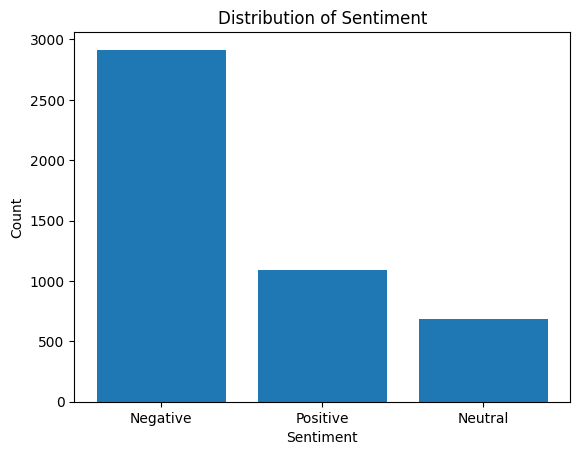

sentiment
Negative    2915
Positive    1089
Neutral      686
Name: count, dtype: int64


In [ ]:

import matplotlib.pyplot as plt


sentiment_counts = df_temiz_copy['sentiment'].value_counts()


plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()


print(sentiment_counts)


In [ ]:
# sentiment sutunundakı dagılımı yüzdesel olarak yazdır

sentiment_counts = df_temiz_copy['sentiment'].value_counts(normalize=True) * 100
print(sentiment_counts)


sentiment
Negative    62.121212
Positive    23.674242
Neutral     14.204545
Name: proportion, dtype: float64


sana attığım csv dosyasında text preproceses işlemleri var. amacım text classification yapmak buna uygun bir text preprocess uygula. text preproceses uygularken değiştireceğin texti ayrı değerlendir ve en son textleri kolay karsılastırabılmek adına eski text verisi ile yeni text verisini yan yana sütünlarda tut. emojileri sil. http veya https leri sil yani linkleri silceksin.  # @ bu ifadelerle başlayan kelimeleri sil. Eğer metnin başında veya sonunda bu ifadeler varsa # @ gibi bu kelimeleri sil ama cümlenin içinde yer alıyorsa o text sütunundaki kelimelerin hepsini sil. en son duplicate olan verilere bak ve sil. ayrıca text kısmı bos olan veriler varsa onların satırını komple sil.

# csv dosyasını kaydet

In [ ]:
# prompt: df temiz copy yi csv dosyasını kaydet

df_temiz_copy.to_csv('/content/drive/MyDrive/otomasyon_tweet/preprocess/3600_clean_lab_temizlenmis.csv', index=False)


# 3600 ile 4800 lük verinin birleştirilmesi

In [ ]:
df_4800 = pd.read_csv('/content/drive/MyDrive/otomasyon_tweet/preprocess/3600_4800_birlestirilmis.csv', encoding='utf-8')

In [ ]:
df_nötr_pozitif = pd.read_csv('/content/drive/MyDrive/otomasyon_tweet/preprocess/cleanlab_df_150_nötr_pozitif.csv', encoding='utf-8')

In [ ]:
df_4800.head()

,clean_text,sentiment
0,ömürboyu borçlu mazlum müslüman müebbet nafaka...,Negative
1,mayısta türkiye sizi tarihin çöplüğüne gömecek,Negative
2,meb öğrenim özrü haric herşeyi düsünüyor bizid...,Negative
3,reis yürü millet yürüsün arkandan,Positive
4,yazik istedigi gibi oynatiyor oynamaya merakli...,Negative


In [ ]:
df_nötr_pozitif.head()

,cleanlab_row_ID,clean_text,sentiment,cleanlab_is_label_issue,cleanlab_label_issue_score,cleanlab_suggested_label,cleanlab_corrected_label,cleanlab_action,cleanlab_top_labels,cleanlab_top_probs,...,cleanlab_has_rare_class,cleanlab_is_empty_text,cleanlab_text_num_characters,cleanlab_is_PII,cleanlab_PII_score,cleanlab_PII_types,cleanlab_PII_items,cleanlab_is_non_english,cleanlab_non_english_score,cleanlab_predicted_language
0,13,bu ülkede geleceğe umut ile bakmamı sağladınız...,Positive,False,0.013177,NaN,Positive,keep,"[""Positive"", ""Neutral""]","[0.9868226738710935, 0.013177326128906595]",...,False,False,123,False,0.0,[],[],True,0.946790,Turkish
1,20,türkiye cumhuriyetinin en köklü en eski partsi...,Positive,False,0.010668,NaN,Positive,keep,"[""Positive"", ""Neutral""]","[0.9893317718968303, 0.010668228103169735]",...,False,False,215,False,0.0,[],[],True,0.965198,Turkish
2,1637,terörizmle mücadele iyi gidiyor boşanmaları ve...,Positive,False,0.421793,NaN,Positive,keep,"[""Positive"", ""Neutral""]","[0.5782072525667339, 0.4217927474332661]",...,False,False,138,False,0.0,[],[],True,0.979778,Turkish
3,4301,türkiye sınırları ötesinde kendisine yöneltile...,Neutral,False,0.170677,NaN,Neutral,keep,"[""Neutral"", ""Positive""]","[0.8293232796735838, 0.17067672032641615]",...,False,False,124,False,0.0,[],[],True,0.999749,Turkish
4,1968,dede sen ne güzel dedesin yaaa,Positive,False,0.074319,NaN,Positive,keep,"[""Positive"", ""Neutral""]","[0.9256805135082126, 0.07431948649178738]",...,False,False,30,False,0.0,[],[],True,0.849798,Turkish


In [ ]:
#  df_nötr_pozitif in clean_text ve cleanlab_corrected_label ını dataframe ata

df_temiz_copy = df_nötr_pozitif[['clean_text', 'cleanlab_corrected_label']]


In [ ]:
df_temiz_copy.head()

,clean_text,cleanlab_corrected_label
0,bu ülkede geleceğe umut ile bakmamı sağladınız...,Positive
1,türkiye cumhuriyetinin en köklü en eski partsi...,Positive
2,terörizmle mücadele iyi gidiyor boşanmaları ve...,Positive
3,türkiye sınırları ötesinde kendisine yöneltile...,Neutral
4,dede sen ne güzel dedesin yaaa,Positive


In [ ]:
# prompt: cleanlab_corrected_label ın ismini sentiment ile değiştir

df_temiz_copy.rename(columns={'cleanlab_corrected_label': 'sentiment'}, inplace=True)


In [ ]:
df_temiz_copy.head()

,clean_text,sentiment
0,bu ülkede geleceğe umut ile bakmamı sağladınız...,Positive
1,türkiye cumhuriyetinin en köklü en eski partsi...,Positive
2,terörizmle mücadele iyi gidiyor boşanmaları ve...,Positive
3,türkiye sınırları ötesinde kendisine yöneltile...,Neutral
4,dede sen ne güzel dedesin yaaa,Positive


In [ ]:
# df_4800 ile df_temiz_copy yi birleştir

df_son = pd.concat([df_4800, df_temiz_copy], axis=0)

In [ ]:
df_son.head()

,clean_text,sentiment
0,ömürboyu borçlu mazlum müslüman müebbet nafaka...,Negative
1,mayısta türkiye sizi tarihin çöplüğüne gömecek,Negative
2,meb öğrenim özrü haric herşeyi düsünüyor bizid...,Negative
3,reis yürü millet yürüsün arkandan,Positive
4,yazik istedigi gibi oynatiyor oynamaya merakli...,Negative


In [ ]:
df_son.shape

(8027, 2)

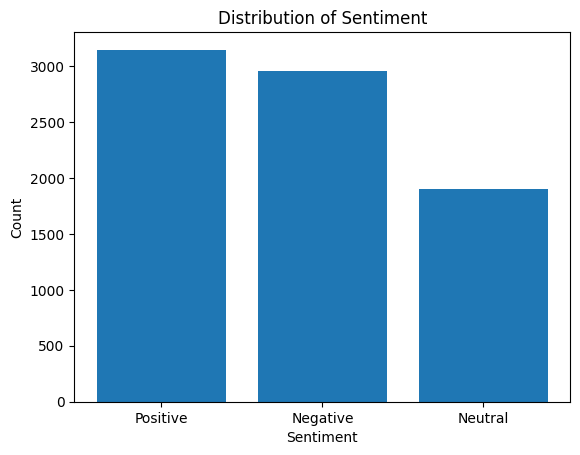

sentiment
Positive    3146
Negative    2955
Neutral     1904
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt


sentiment_counts = df_son['sentiment'].value_counts()


plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()


print(sentiment_counts)

In [ ]:
# prompt: df son da duplicate veriler varsa sil

df_son1 = df_son.drop_duplicates()


In [ ]:
df_son1.shape

(7947, 2)

In [ ]:
# prompt: df_son1 de null değer olan satır varsa sil

df_son2 = df_son1.dropna(axis=0)


In [ ]:
df_son2.shape

(7923, 2)

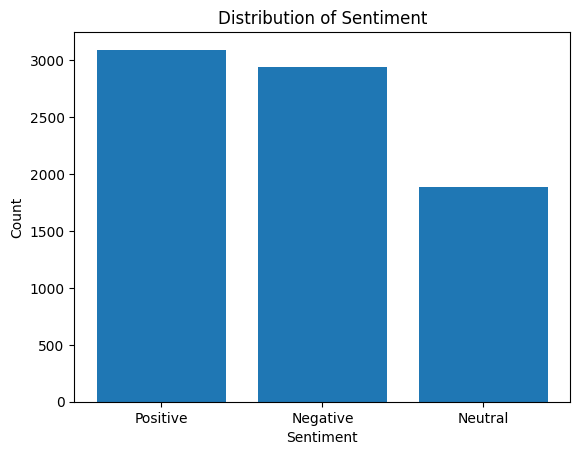

sentiment
Positive    3093
Negative    2945
Neutral     1885
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt


sentiment_counts = df_son2['sentiment'].value_counts()


plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()


print(sentiment_counts)

In [ ]:
# dfson2 yi csv dosyasına kaydet

df_son2.to_csv('/content/drive/MyDrive/otomasyon_tweet/preprocess/df8000veri_son.csv', index=False)


In [ ]:
# prompt: df_3600  sadece clean_text ve sentiment sütunlarını al

df_3600 = df_3600[['clean_text', 'sentiment']]
df_4800 = df_4800[['clean_text', 'sentiment']]

In [ ]:
df_3600.head()

,clean_text,sentiment
0,ömürboyu borçlu mazlum müslüman müebbet nafaka...,Negative
1,mayısta türkiye sizi tarihin çöplüğüne gömecek,Negative
2,meb öğrenim özrü haric herşeyi düsünüyor bizid...,Negative
3,reis yürü millet yürüsün arkandan,Positive
4,yazik istedigi gibi oynatiyor oynamaya merakli...,Negative


In [ ]:
# prompt: eğer corrected labelı boş boş değilse corrected labelı nan olmayanları o satırın sentiment değerini clean lab değeri ile değiştir

df_3600.loc[df_3600['cleanlab_corrected_label'].notna(), 'sentiment'] = df_3600['cleanlab_corrected_label']


In [ ]:
df_3600.head(25)

,clean_text,sentiment
0,ömürboyu borçlu mazlum müslüman müebbet nafaka...,Negative
1,mayısta türkiye sizi tarihin çöplüğüne gömecek,Negative
2,meb öğrenim özrü haric herşeyi düsünüyor bizid...,Negative
3,reis yürü millet yürüsün arkandan,Positive
4,yazik istedigi gibi oynatiyor oynamaya merakli...,Negative
5,asıl olan nedir acaba gelecek hafta tam gün yu...,Negative
6,sizler eger vatanseverseniz adam gibi destek v...,Negative
7,valla bi italyan ispanyol sırp kosova li kadar...,Negative
8,den yargılananlara indirim için destek istiyor...,Neutral
9,allah rahmet eylesin mekanı cennet olsun inşaa...,Positive


In [ ]:
df_4800.head(25)

,clean_text,sentiment
0,ömürboyu borçlu mazlum müslüman müebbet nafaka...,Negative
1,mayısta türkiye sizi tarihin çöplüğüne gömecek,Negative
2,meb öğrenim özrü haric herşeyi düsünüyor bizid...,Negative
3,reis yürü millet yürüsün arkandan,Positive
4,yazik istedigi gibi oynatiyor oynamaya merakli...,Negative
5,asıl olan nedir acaba gelecek hafta tam gün yu...,Negative
6,sizler eger vatanseverseniz adam gibi destek v...,Negative
7,valla bi italyan ispanyol sırp kosova li kadar...,Negative
8,den yargılananlara indirim için destek istiyor...,Neutral
9,allah rahmet eylesin mekanı cennet olsun inşaa...,Positive


In [ ]:
df_4800.head()

,clean_text,sentiment
0,ömürboyu borçlu mazlum müslüman müebbet nafaka...,Negative
1,mayısta türkiye sizi tarihin çöplüğüne gömecek,Negative
2,meb öğrenim özrü haric herşeyi düsünüyor bizid...,Negative
3,reis yürü millet yürüsün arkandan,Positive
4,yazik istedigi gibi oynatiyor oynamaya merakli...,Negative


In [ ]:
df_4800.shape

(4692, 2)

In [ ]:
df_3600.tail()

,clean_text,sentiment
3691,başkan bu neyin nesi ne dedigni anlamadım sayd...,Negative
3692,efendim sayılı ohalkhk ile birçok mahkum çıktı...,Negative
3693,azıcık ondan azıcık bundan abiyidik gubiyidik ...,Positive
3694,coğrafya gibi önemli bir ders neden seçmeli so...,Neutral
3695,ee lige yaraşır bi stat olmuş,Positive


In [ ]:
# prompt: df4800 ün 3690 ile 3696 arasındakii verileri bastır

df_4800.iloc[3690:3696]


,clean_text,sentiment
3690,istanbul da suya zam sen gez trak trak,Negative
3691,pusula bir zarfta ama tanesi iptal diğerleri n...,Negative
3692,kurumlar yaptıkları telafi dersleri ile zararl...,Negative
3693,allah sağlıklı uzun ömürler versin,Positive
3694,sayın bakanım binlerce veteriner hekim ve aile...,Neutral
3695,kadermahkumunun umudurte cumhurbaşkanım bzde ç...,Neutral


In [ ]:
# prompt: iki dataframin clean_text sütunlarını karşılaştır. eğer 3600 ün içinde 4800 ün datası yoksa o satırı sentimetni ile 3600 ekle  concat komutu ile ekle for döngüsü ile arat


for i in range(len(df_4800)):
  if not df_4800['clean_text'].iloc[i] in df_3600['clean_text'].values:
    df_3600 = pd.concat([df_3600, df_4800.iloc[i:i+1]], ignore_index=True)




In [ ]:
df_3600.shape

(4683, 2)

In [ ]:
df_3600.head(25)

,clean_text,sentiment
0,ömürboyu borçlu mazlum müslüman müebbet nafaka...,Negative
1,mayısta türkiye sizi tarihin çöplüğüne gömecek,Negative
2,meb öğrenim özrü haric herşeyi düsünüyor bizid...,Negative
3,reis yürü millet yürüsün arkandan,Positive
4,yazik istedigi gibi oynatiyor oynamaya merakli...,Negative
5,asıl olan nedir acaba gelecek hafta tam gün yu...,Negative
6,sizler eger vatanseverseniz adam gibi destek v...,Negative
7,valla bi italyan ispanyol sırp kosova li kadar...,Negative
8,den yargılananlara indirim için destek istiyor...,Neutral
9,allah rahmet eylesin mekanı cennet olsun inşaa...,Positive


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/otomasyon_tweet/preprocess/3600_clean_lab_temizlenmis2.csv', encoding='utf-8')


In [ ]:
# prompt: df nin clean text sentiment ve corrected labelsını al

df_clean_text = df[['clean_text', 'sentiment', 'cleanlab_corrected_label']]
df_clean_text.head()


,clean_text,sentiment,cleanlab_corrected_label
0,ömürboyu borçlu mazlum müslüman müebbet nafaka...,Negative,NaN
1,mayısta türkiye sizi tarihin çöplüğüne gömecek,Negative,NaN
2,meb öğrenim özrü haric herşeyi düsünüyor bizid...,Negative,NaN
3,reis yürü millet yürüsün arkandan,Positive,NaN
4,yazik istedigi gibi oynatiyor oynamaya merakli...,Negative,NaN


In [ ]:
# prompt: corrcted labelı nan olanları kaldır sadece dolu olanları ver

df_clean_text = df_clean_text[df_clean_text['cleanlab_corrected_label'].notna()]


In [ ]:
df_clean_text.head(100)

,clean_text,sentiment,cleanlab_corrected_label
60,başkanım loading,Neutral,Neutral
80,bu görseli sadece havancılar anlar,Neutral,Neutral
118,hattıma kod gelmedi eczaneye gittim tc numaram...,Neutral,Negative
119,gözümüz asdep in ününde değil sayın bakanım gö...,Positive,Positive
120,sayin bakanim kahvehaneler açilacak yerler içi...,Neutral,Neutral
...,...,...,...
3633,covid da pulmoner rehabilitasyonun ne kadar ön...,Positive,Positive
3634,sen hepimizin cumhurbaşkanısın sadece şikecile...,Positive,Positive
3635,inanki şu anda gönlüm ne para nede malda tek d...,Positive,Positive
3636,allah yardım etsin devletimize,Neutral,Positive


In [ ]:
#  mutlu bayramlar başkanım teşekkürler yazısını df_3600 ın içinde arat ve sentiment sütunu ile bastır

df_3600[df_3600['clean_text'] == "mutlu bayramlar başkanım teşekkürler"]['sentiment']


1308    Positive
Name: sentiment, dtype: object

In [ ]:
# prompt: df_3600 ün sentiment dağılımını bastır

sentiment_counts = df_3600['sentiment'].value_counts()
print(sentiment_counts)


sentiment
Negative    2955
Positive    1078
Neutral      650
Name: count, dtype: int64


In [ ]:

df_150 = pd.read_csv('/content/drive/MyDrive/otomasyon_tweet/preprocess/predictions2_noktalamayok.csv', encoding='utf-8')


In [ ]:
df_150.head()

,clean_text,sentiment
0,öğretmenin itibarı hiç bu kadar kayıp yaşamamı...,Negative
1,eyt neden karşı çıkıyorsunuz,Negative
2,askeri salin artik vekil mekil dinlemesinler a...,Negative
3,allah kolaylık versin reisim,Positive
4,allah bereket versin,Positive


In [ ]:
# prompt: df150 nin sadece clean tex ve sentimentini al

df_150.shape

(12545, 2)

In [ ]:
# prompt: df150 nin labellarının sayısını cıkart

print(df_150['sentiment'].value_counts())


sentiment
Negative    7659
Positive    2736
Neutral     2150
Name: count, dtype: int64


In [ ]:
# prompt: df150 nn labelı neutral ve pozitive olanlarını dataframe e bas

df_150_nn = df_150[df_150['sentiment'].isin(['Neutral', 'Positive'])]
df_150_nn.head()



,clean_text,sentiment
3,allah kolaylık versin reisim,Positive
4,allah bereket versin,Positive
9,atama talep ediyoruz lütfen,Neutral
10,yardım et lütfen araştırıyordum annem ve karde...,Neutral
11,unutmayın ki güvenilir gıda gıda mühendisi cin...,Neutral


In [ ]:
df_4800.to_csv('/content/drive/MyDrive/otomasyon_tweet/preprocess/3600_4800_birlestirilmis.csv', index=False)


NameError: name 'df_4800' is not defined

In [ ]:
# prompt: df_150_nn i csv olarak kaydet

df_150_nn.to_csv('/content/drive/MyDrive/otomasyon_tweet/preprocess/cleanlab_df_150_nötr_pozitif.csv', index=False)


In [ ]:
df_150_nn.shape

(4886, 2)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/otomasyon_tweet/otomasyon-tweet-393317-2935284834314643-1084383294752112128.json'